In [1]:
from scipy.signal import savgol_filter


In [14]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

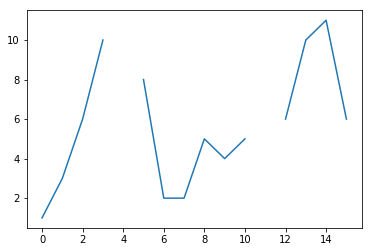

In [76]:
ts = np.array([1, 3,6,np.NaN,np.NaN,np.NaN,2,2,5,34,5,np.NaN,56,34,np.NaN,6])


ts = np.array([1, 3,6, 10,np.NaN,8, 2,2,5,4,5,np.NaN,6,10,11,6])

plt.plot(ts)
s_ = pd.Series(ts)
new_ts = s_.interpolate(method = 'linear', limit = 100)

In [96]:
ts = np.random.uniform(0, 15, 85)

In [104]:
sg_filtered1 = savgol_filter(ts, 7,3)
sg_filtered2 = savgol_filter(ts, 5,3)
sg_filtered3 = savgol_filter(ts, 7,5)



In [106]:
ER1 = (ts - sg_filtered1).T@(ts - sg_filtered1)
ER2 = (ts - sg_filtered2).T@(ts - sg_filtered2)
ER3 = (ts - sg_filtered3).T@(ts - sg_filtered3)
ER1, ER2, ER3

(1182.1846020401231, 1053.1871656015451, 924.35878392125278)

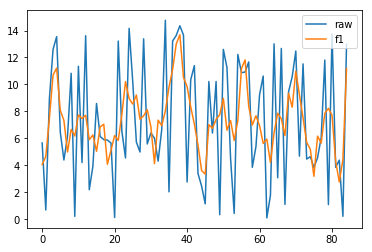

In [108]:
plt.plot(ts, label = 'raw')
plt.plot(sg_filtered1, label = 'f1')
# plt.plot(sg_filtered2, label = 'f2')
# plt.plot(sg_filtered3, label = 'f3')

plt.legend()

In [95]:
W = None
import math
it = 0
smoother_ts = new_ts
F = 100
while True:
        smoother_ts = savgol_filter(smoother_ts, window_length=5, polyorder=3, mode='nearest')
        diff = smoother_ts - new_ts
        
        
        
        sign = diff > 0    
        if W is None:
            W = 1 - np.abs(diff) / np.max(np.abs(diff)) * sign 
            
#             wnd, order = wnds[1], orders[1]                                                                            
        fitting_score = np.sum(np.abs(diff) * W)   
        print(it, ':', fitting_score)
        #print it, ' : ', fitting_score
        if fitting_score > F:
            break
        if math.isnan(fitting_score):
            break
        else:
            F = fitting_score
            it += 1        
        smooth_ts = smoother_ts * sign + new_ts * (1 - sign)

0 : 7.45044642857
1 : 8.31818877551


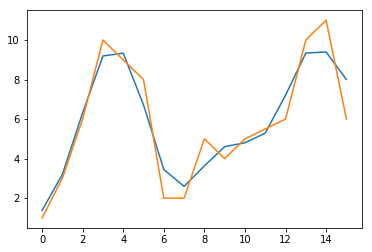

In [94]:
plt.plot(smoother_ts)
plt.plot(new_ts)